<a href="https://colab.research.google.com/github/martinkim1/a-school-lecture/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EA%B3%BC%EC%A0%9C/mlHw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사례1

In [1]:
##########얼굴인식(Face recogniton) 예제#########
from sklearn.datasets import fetch_lfw_people  #data set 불러오기
faces=fetch_lfw_people(min_faces_per_person=70,resize=0.4)
n_samples, h, w = faces.images.shape
X=faces.data
y=faces.target

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)


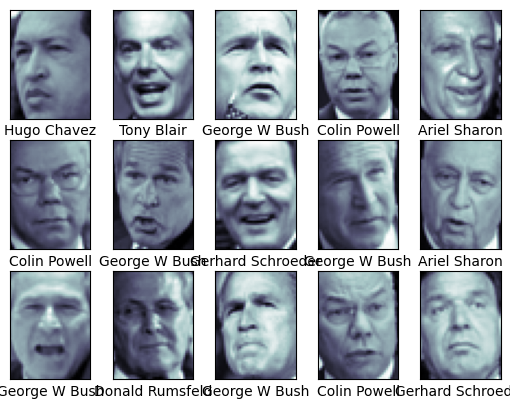

In [2]:
import matplotlib.pyplot as plt #pyplot 함수의 호출
fig,ax=plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [3]:
X=faces.data
n_features=X.shape[1]
y=faces.target
target_names=faces.target_names
print(target_names)            #얼굴인식 Label 이름
n_classes=target_names.shape[0]
print(n_classes)               #Label의 종류의 총갯수

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
7


In [4]:
# training set과 test set으로 데이터 나누기 --> 75:25의 비율
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [5]:
#주성분 분석을 이용해 150개의 특성변수에 대한 차원 축소
#Randomized PCA사용  : 8장에서 자세하게 다룸.
from sklearn.decomposition import PCA
n_components=150
pca=PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)
eigenfaces=pca.components_.reshape(n_components,h,w)
X_train_pca=pca.transform(X_train)  #주성분의 training data
X_test_pca=pca.transform(X_test)    #주성분의 test data

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#커널 SVM을 이용 & 커널함수:방사형기저함수(kernel='rbf')를 사용
#방사기저함수의 최적화 gamma와 완화변수의 허용정도 c를 찾기위해 'GridSearchCV' 모듈 사용
param_grid={'C':[1e3,5e3,1e4,5e4,1e5],
            'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
clf=GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)
clf.fit(X_train_pca,y_train)
##  프로그램 실행시 약 1분정도 시간 소요됨.

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]})

In [7]:
print(clf.best_params_)            # 추정 parameter
print(clf.best_estimator_)

{'C': 1000.0, 'gamma': 0.005}
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [8]:
#학습된 결과를 시험데이터에 적용하여 정확도, recall, 그리고 f1을 제공하는 classification_report
y_fit=clf.predict(X_test_pca)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix        #confusion matrix를 출력
print(classification_report(y_test,y_fit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.79      0.88      0.83        60
  Donald Rumsfeld       0.80      0.59      0.68        27
    George W Bush       0.85      0.98      0.91       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       1.00      0.83      0.91        36

         accuracy                           0.86       322
        macro avg       0.89      0.73      0.79       322
     weighted avg       0.87      0.86      0.85       322



#사례 2

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

0.9975195094760312
0.9909445528002229
0.9909445528002229


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


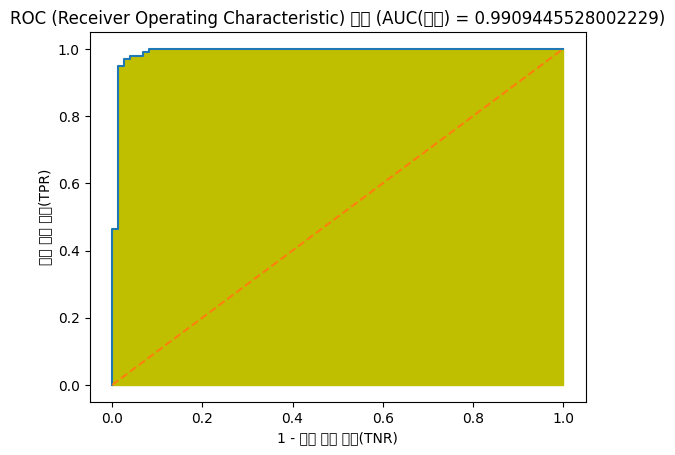

In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
#
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import metrics

from sklearn import datasets
dataset = datasets.load_breast_cancer()
x_data = dataset.data
y_data = dataset.target
#print(x_data.shape) #(569, 30)
#print(y_data.shape) #(569,)

####################

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data = scaler.transform(x_data)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

estimator = SVC(kernel='rbf', C=10, gamma=0.1)

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train)
score = metrics.roc_auc_score(y_train, estimator.decision_function(x_train))
#score = metrics.roc_auc_score(y_train, estimator.predict_proba(x_train)[:,1])
print(score) #1.0

y_predict = estimator.predict(x_test)
score = metrics.roc_auc_score(y_test, estimator.decision_function(x_test))
#score = metrics.roc_auc_score(y_test, estimator.predict_proba(x_test)[:,1])
print(score) #1.0

#ROC 곡선

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
fpr, tpr, thresholds = metrics.roc_curve(y_test, estimator.decision_function(x_test)) #곡선 그리기
#fpr, tpr, thresholds = metrics.roc_curve(y_test, estimator.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, color='y')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('1 - 진짜 음성 비율(TNR)')
#plt.xlabel('거짓 양성 비율(FPR)')
plt.ylabel('진짜 양성 비율(TPR)')
#'''
score = metrics.auc(fpr, tpr) #면적 구하기
#'''
'''
score = metrics.roc_auc_score(y_test, estimator.decision_function(x_test)) #면적 구하기
#score = metrics.roc_auc_score(y_test, estimator.predict_proba(x_test)[:,1])
'''
print(score) #1.0
plt.title('ROC (Receiver Operating Characteristic) 곡선 (AUC(면적) = {})'.format(score))
plt.show()